In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [130]:
solarpower_data = pd.read_csv('solarpower.csv', sep=',')

In [131]:
solarpower_data.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


In [132]:
solarpower_data['cum_power'].mean()

23775.573795180724

In [133]:
for i in range(len(solarpower_data['cum_power'])):
    if solarpower_data['cum_power'][i] == -1:
        solarpower_data['cum_power'][i] = (solarpower_data['cum_power'][i-1] + solarpower_data['cum_power'][i-1])/2

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_9804\751350241.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
solarpower_data['cum_power'].mean()

23848.218373493975

In [135]:
solarpower_data['day_power'] = pd.Series()

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_9804\3161002092.py:1: FutureWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [136]:
for i in range(len(solarpower_data['day_power'])):
    if i > 0:
        solarpower_data['day_power'][i] = solarpower_data['cum_power'][i] - solarpower_data['cum_power'][i-1]

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_9804\4072792300.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [137]:
solarpower_data['day_power'][0] = 0

C:\Users\artem.truschelev\AppData\Local\Temp\ipykernel_9804\1715412085.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [138]:
solarpower_data['date'] = pd.to_datetime(solarpower_data['date'], dayfirst=True)

In [139]:
solarpower_data['month_year'] = solarpower_data['date'].dt.to_period('M')

In [140]:
solar_s = solarpower_data.groupby('month_year')['day_power'].mean()

<AxesSubplot: title={'center': 'График средней ежедневной выработки солнечной энергии на каждый месяц-год'}, xlabel='Дата', ylabel='Выработка энергии'>

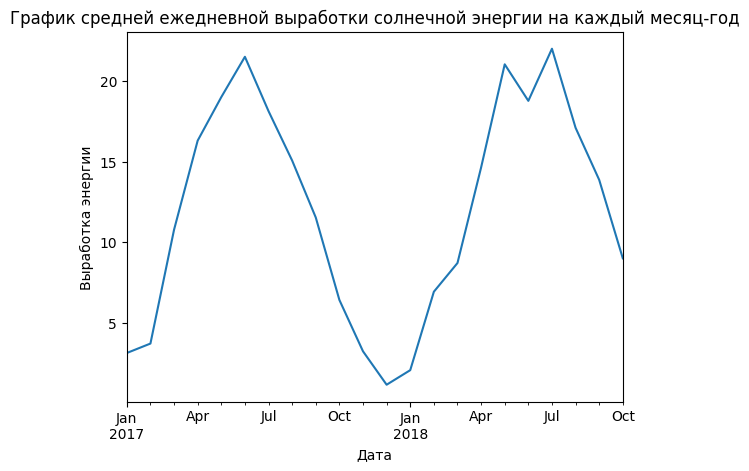

In [141]:
solar_s.plot(kind='line',xlabel='Дата', ylabel='Выработка энергии', title = 'График средней ежедневной выработки солнечной энергии на каждый месяц-год')